# AMAZON ALEXA REVIEWS - SENTIMENTAL ANALYSIS

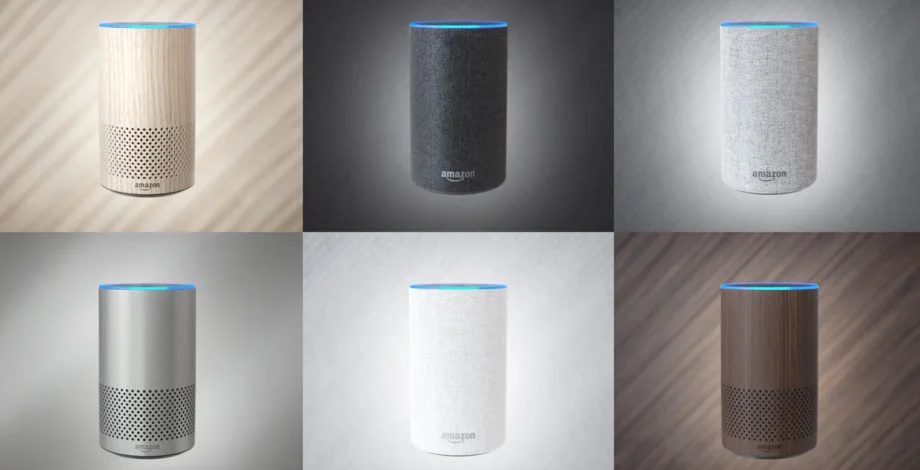

###### Importing basic required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Importing the dataset

In [2]:
alexa_reviews = pd.read_csv(r"F:\DATA SCIENCE\NLP\amazon_alexa.tsv", delimiter = '\t')
alexa_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


###### Studying the dataset

In [3]:
alexa_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


- There are 3150 rows (reviews) and 5 columns present in the dataset
- There are no null values present in the dataset

###### Descriptive Statistics of the dataset

In [4]:
alexa_reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


- We can observe from mean value that most ratings of reviews of alexa is about 5, which means people like alexa
- We can observe that most people gave feedback as 1 (positive feedback)

In [5]:
alexa_reviews.describe(include = 'object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


- We can observe that most people wrote reviews around 30-July-2018.
- Most people used and reviewed Back Dot Alexa variant
- 16 variants of Alexa are used by people
- 2301 unique verified reviews are given on Alexa

### Univariate Analysis

###### Studying the target variable

In [6]:
alexa_reviews['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

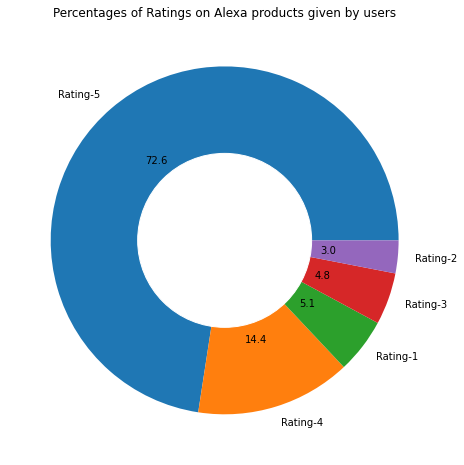

In [7]:
plt.figure(figsize = (10,8))
plt.pie(x = alexa_reviews['rating'].value_counts(), labels = ['Rating-5','Rating-4','Rating-1','Rating-3','Rating-2'],  autopct = '%.1f')
plt.title('Percentages of Ratings on Alexa products given by users')

central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.show()

- We can see that most people gave (around 72.6 %) 5 rating to Alexa products, indicating that users are quite happy and satisfied on it's usage.
- We can also see that people gave mostly positive ratings (4 &5) contributing (72.6 % + 14.4 % = 87 %)
- There are around 13 % users that are not that satisfied with okayish ratings (1,2 & 3) given by them.

###### Studying the variation column

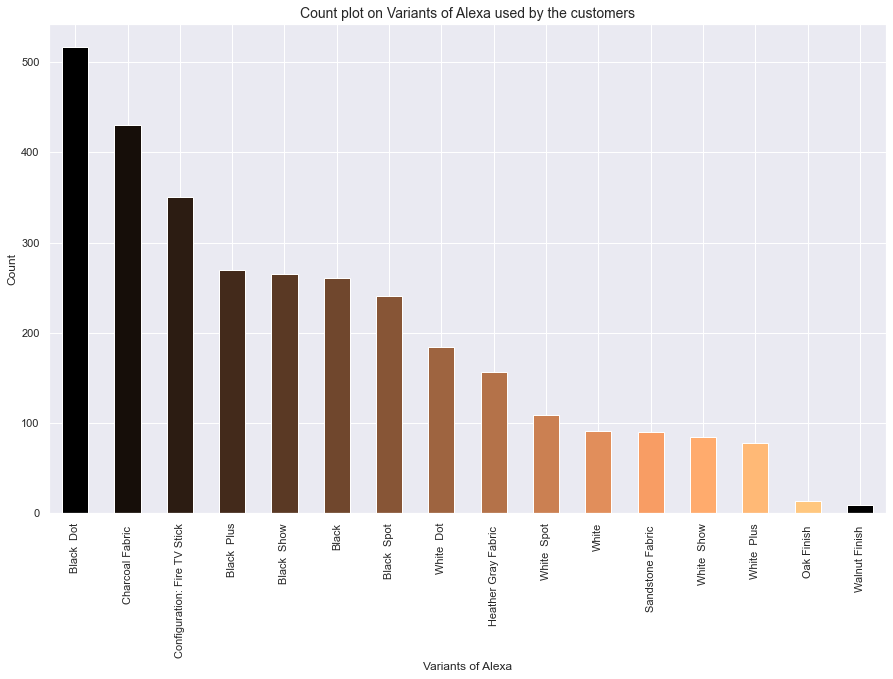

In [10]:
sns.set_theme()
# sns.countplot(x = alexa_reviews['variation'])
alexa_reviews['variation'].value_counts().plot.bar(color =plt.cm.copper(np.linspace(0,1,15)), figsize = (15,9))
plt.xticks(rotation = 90)
plt.xlabel('Variants of Alexa', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Count plot on Variants of Alexa used by the customers', fontsize = 14)
plt.show()

- We can observe that customers are using 'Black Dot' variant of Alexa quite often followed by 'Charcoal Fabric' and 'Configuration: Fire TV Stick'
- We can also see that customers are least interested in using 'Oak Finish' and 'Walnut Finish' Alexa variants.

###### Studying the ratings given on 'Back Dot' and 'Charcoal Fabric' Alexa products

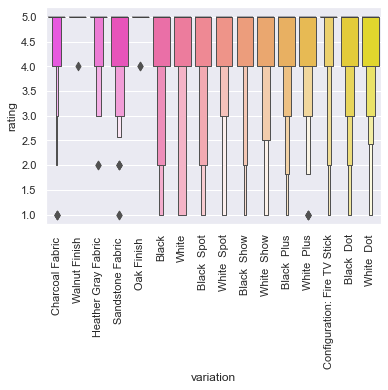

In [11]:
sns.boxenplot(x = alexa_reviews['variation'], y = alexa_reviews['rating'], palette = 'spring')
plt.xticks(rotation = 90)
plt.show()

- We can observe that 'Black Dot' 'White Dot' and 'Configuration :Fire TV stick' Alexa variants have mostly 4-5 ratings. But they also have some users giving 1-3 ratings also.
- We can observe that 'Walnut Finish' and 'Oak Finish' which are rarely used by customers are giving 4-5 ratings when used.
- So, probably the charcoal fabric and walnut finish alexa are better in quality with minimal to zero issues due to their high ratings given by customers and hence they may be more costly as compared to Black Dot and White Dot due to less no. of people purchasing it.

###### Studying the feedback variable

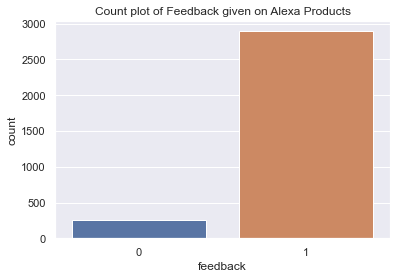

In [12]:
sns.countplot(x = alexa_reviews['feedback'])
plt.title('Count plot of Feedback given on Alexa Products')
plt.show()

###### Analyzing length of the reviews given on Alexa products

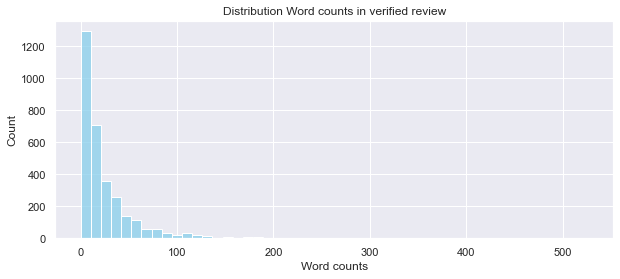

In [13]:
len_lst = []
for i in alexa_reviews['verified_reviews']:
    len_lst.append(len(i.split()))
plt.figure(figsize = (10,4))
sns.histplot(x = len_lst, color = 'skyblue', bins = 50)
plt.xlabel('Word counts')
plt.title('Distribution Word counts in verified review')
plt.show()

- We can clearly see that most of the reviews given by customers are between 1 to 20 words.
- Rarely customers have written review containing more than 100 words.

In [14]:
alexa_reviews['review_length'] = len_lst
alexa_reviews.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,1


### Bivariate Analysis

###### Studying relation between ratings and length of reviews

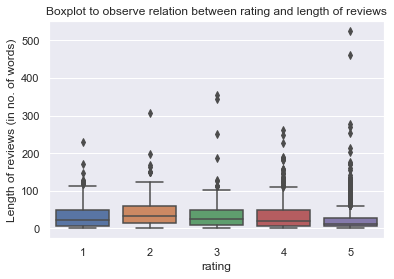

In [15]:
sns.boxplot(x = alexa_reviews['rating'], y = len_lst)
plt.ylabel('Length of reviews (in no. of words)')
plt.title('Boxplot to observe relation between rating and length of reviews')
plt.show()

- We can see that customers giving 5 ratings are giving shorter reviews (maybe telling in brief that they love the product).But they are also the ones writing longest reviews (maybe telling about all advantages they gain from the product)
- We can see that people giving lower ratings (1, 2 &3) are giving shorter reviews (may be telling that they didn't like the product). No customers giving lower ratings are writing reviews more than 350 words which is max.
- Customer giving average rating of 3 writing somewhat longer review about 350 words can be considered to look upon, so that we can consider and work on feedback that he may have provided.

In [16]:
import warnings
warnings.filterwarnings('ignore')
print(alexa_reviews[alexa_reviews['review_length'] >= 350][alexa_reviews['rating'] == 3]['verified_reviews'])

563    I received my Echo Dot today in good condition...
Name: verified_reviews, dtype: object


In [21]:
print(alexa_reviews['verified_reviews'][563])

I received my Echo Dot today in good condition, but be advised: I paid $29.99 for it and Amazon has (as of this writing) raised the price to $39.99, so do your research before buying so you can get a good deal!Set up with the Dot went simple enough — plug it in, follow the app instructions... except initially it took a while to actually show up in my iPhone’s WiFi settings. I called Amazon customer service, and I dunno what it is, but lately I’ve been getting terrible support. The guy that took my call just rambled off a (completely unhelpful) script and I ended up setting up the Dot while he was in the middle of his spiel.I’m not sure if this is the norm or if it’s because this is refurbished, but the Dot has a pretty finicky wifi range and randomly disconnects even though the app shows that the range of my 5GHz connection is strong. Reconnecting is a pain each time as well.All that said, when Alexa works, she works amazingly well. I don’t have a speaker hooked up to it, but one thing

- Here we can observe the verified review having more than or equal to 350 words giving 3 rating.
- Here the Amazon Alexa team can work upon their customer support team

###### Studying the relation between length of reviews and variation

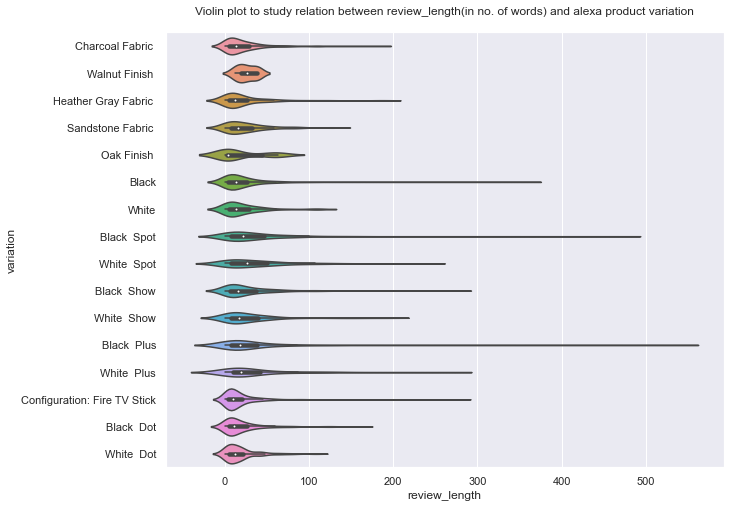

In [17]:
sns.set_theme()
plt.figure(figsize = (10,8))
sns.violinplot(x = alexa_reviews['review_length'], y = alexa_reviews['variation'])
plt.title('Violin plot to study relation between review_length(in no. of words) and alexa product variation\n')
plt.show()

- We can see that longest review has been written for Black Plus variant followed by Black Spot, and then Black.
- So, 'Black' variants of Alexa products are given more focus by the customers by writing long review on them.
- We can look upon those long reviews and act accordingly in case it is of negative sentiment.

###### Studying relation between feedback and rating of the alexa products

<AxesSubplot:xlabel='feedback', ylabel='review_length'>

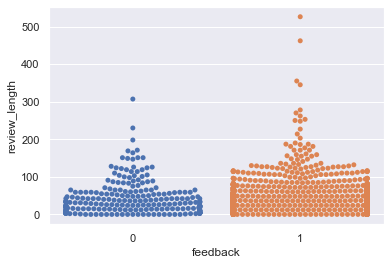

In [18]:
sns.swarmplot(x = alexa_reviews['feedback'], y = alexa_reviews['review_length'])

We can observe that reviews with feedback as 1 are having long reviews as comapared to reviews with feedback 0

### Multivariate Analysis

###### Correlation analysis

In [19]:
# Converting categorical values in variation column to encoded values to get it's correlation with other variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
alexa_reviews['variations_enocoded'] = le.fit_transform(alexa_reviews['variation'])

In [21]:
alexa_reviews.head()

,rating,date,variation,verified_reviews,feedback,review_length,variations_enocoded
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3,5
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2,5
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,10
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,1,5


In [22]:
alexa_reviews.corr()

,rating,feedback,review_length,variations_enocoded
rating,1.000000,0.861968,-0.185887,-0.004397
feedback,0.861968,1.000000,-0.128978,-0.004205
review_length,-0.185887,-0.128978,1.000000,0.023023
variations_enocoded,-0.004397,-0.004205,0.023023,1.000000


We can observe the strong correlation between rating variable and feedback variable.

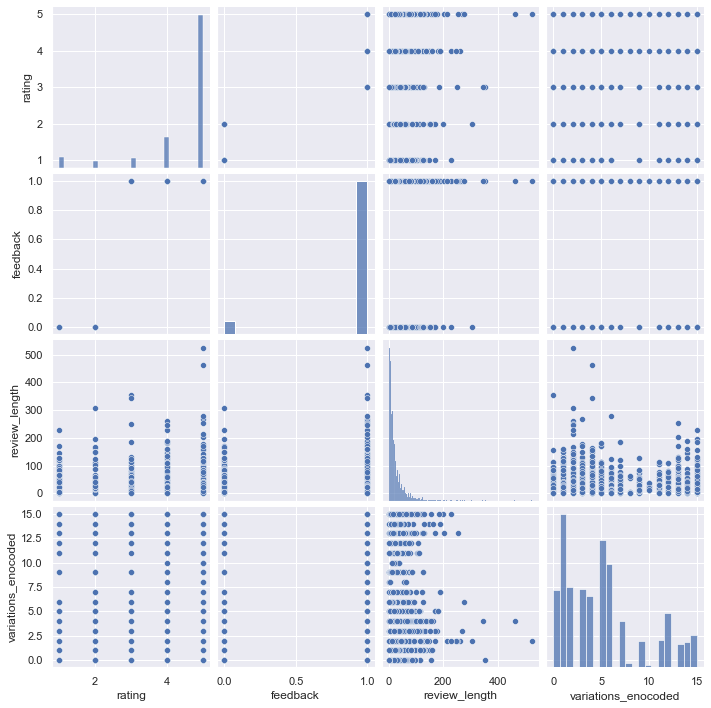

In [23]:
# Pairplot
sns.pairplot(alexa_reviews)

###### Text Preprocessing

In [38]:
df= alexa_reviews[['verified_reviews']]
df.head()

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music


###### 1. Lower case conversion

In [39]:
df['lowercase_reviews'] = df['verified_reviews'].apply(lambda x : x.lower())
df.head()

,verified_reviews,lowercase_reviews
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music


###### 1. Tokenization

In [40]:
from nltk.tokenize import word_tokenize

In [41]:
tokens = []
for i in df['lowercase_reviews']:
    tokens.append(word_tokenize(i))
df['tokens'] = tokens

In [42]:
df.head()

,verified_reviews,lowercase_reviews,tokens
0,Love my Echo!,love my echo!,"[love, my, echo, !]"
1,Loved it!,loved it!,"[loved, it, !]"
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, playing, a, game, ,, you, c..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,Music,music,[music]


###### 3. Removing punctuations

In [43]:
import string

In [44]:
PUNCTUATIONS = string.punctuation
print(PUNCTUATIONS)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [45]:
def remove_punctuations(text):
    return text.translate(str.maketrans('','',PUNCTUATIONS))

In [46]:
df['reviews_wo_punct'] = df['lowercase_reviews'].apply(lambda x : remove_punctuations(x))
df.head()

,verified_reviews,lowercase_reviews,tokens,reviews_wo_punct
0,Love my Echo!,love my echo!,"[love, my, echo, !]",love my echo
1,Loved it!,loved it!,"[loved, it, !]",loved it
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, playing, a, game, ,, you, c...",sometimes while playing a game you can answer ...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,"[i, have, had, a, lot, of, fun, with, this, th...",i have had a lot of fun with this thing my 4 y...
4,Music,music,[music],music


###### 2. Stopwords Removal

In [47]:
from nltk.corpus import stopwords

In [48]:
STOPWORDS = stopwords.words('english')
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS ])

In [50]:
df['reviews_wo_stopwords'] = df['reviews_wo_punct'].apply(lambda x : remove_stopwords(x))
df.head()

,verified_reviews,lowercase_reviews,tokens,reviews_wo_punct,reviews_wo_stopwords
0,Love my Echo!,love my echo!,"[love, my, echo, !]",love my echo,love echo
1,Loved it!,loved it!,"[loved, it, !]",loved it,loved
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, playing, a, game, ,, you, c...",sometimes while playing a game you can answer ...,sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,"[i, have, had, a, lot, of, fun, with, this, th...",i have had a lot of fun with this thing my 4 y...,lot fun thing 4 yr old learns dinosaurs contro...
4,Music,music,[music],music,music


###### 4. converting number to words

In [51]:
import num2words
from num2words import num2words

In [52]:
def num_to_word(text):
    return ' '.join([num2words(i) if i.isdigit() == True else i for i in text.split()])

In [53]:
df['reviews_num2words'] = df['reviews_wo_stopwords'].apply(lambda x : num_to_word(x))
df.head()

,verified_reviews,lowercase_reviews,tokens,reviews_wo_punct,reviews_wo_stopwords,reviews_num2words
0,Love my Echo!,love my echo!,"[love, my, echo, !]",love my echo,love echo,love echo
1,Loved it!,loved it!,"[loved, it, !]",loved it,loved,loved
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, playing, a, game, ,, you, c...",sometimes while playing a game you can answer ...,sometimes playing game answer question correct...,sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,"[i, have, had, a, lot, of, fun, with, this, th...",i have had a lot of fun with this thing my 4 y...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing four yr old learns dinosaurs con...
4,Music,music,[music],music,music,music


###### 5. Lemmatization

In [60]:
import nltk

In [61]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {'N' : wordnet.NOUN, 'V' : wordnet.VERB, 'J' : wordnet.ADJ, 'R' : wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_word = nltk.pos_tag(tokens = text.split())
    return ' '.join([lemmatizer.lemmatize(word, pos = wordnet_map.get(pos[0], wordnet.NOUN)) for (word,pos) in pos_tagged_word])

In [62]:
df['review_lemmatized'] = df['reviews_num2words'].apply(lambda x : lemmatize_words(x))
df.head()

,verified_reviews,lowercase_reviews,tokens,reviews_wo_punct,reviews_wo_stopwords,reviews_num2words,review_lemmatized
0,Love my Echo!,love my echo!,"[love, my, echo, !]",love my echo,love echo,love echo,love echo
1,Loved it!,loved it!,"[loved, it, !]",loved it,loved,loved,love
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, playing, a, game, ,, you, c...",sometimes while playing a game you can answer ...,sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometimes play game answer question correctly ...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,"[i, have, had, a, lot, of, fun, with, this, th...",i have had a lot of fun with this thing my 4 y...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing four yr old learns dinosaurs con...,lot fun thing four yr old learn dinosaur contr...
4,Music,music,[music],music,music,music,music


### Extracting 20 most frequently used words by customers in their reviews

In [63]:
from collections import Counter
count = Counter()
for text in df['review_lemmatized']:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('love', 1053),
 ('echo', 847),
 ('great', 727),
 ('use', 656),
 ('work', 640),
 ('alexa', 586),
 ('like', 525),
 ('music', 524),
 ('get', 488),
 ('sound', 421),
 ('one', 411),
 ('easy', 363),
 ('device', 343),
 ('dot', 337),
 ('set', 333),
 ('good', 327),
 ('play', 314),
 ('speaker', 303),
 ('buy', 294),
 ('product', 275)]

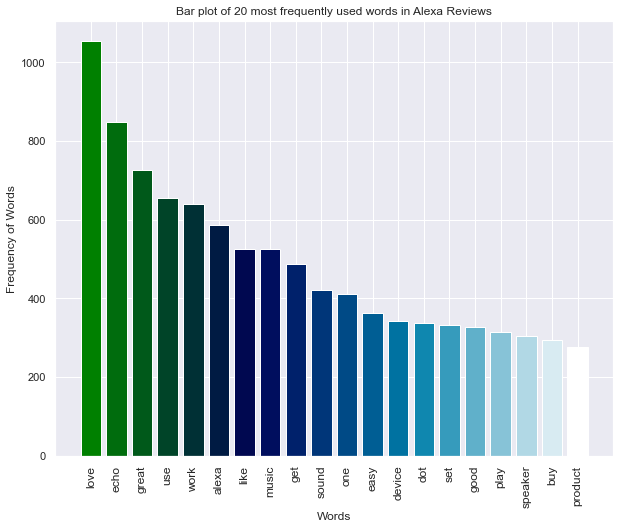

In [64]:
freq_20_words = []
word_freq = []
for word, freq in count.most_common(20):
    freq_20_words.append(word)
    word_freq.append(freq)

plt.figure(figsize = (10,8))
plt.bar(x = freq_20_words, height = word_freq, color = plt.cm.ocean(np.linspace(0,1,20)))
plt.xlabel('Words')
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel('Frequency of Words')
plt.title('Bar plot of 20 most frequently used words in Alexa Reviews')
plt.show()

- We can observe that 'love', 'great' 'good' are frequently used words in the reviews. So, we can say that people are loving Alexa products.

###### Visualizing word frequencies using word cloud - better visulaization of frequently used words in reviews

In [65]:
# !pip install wordcloud

In [66]:
from wordcloud import WordCloud

In [67]:
freq_dict = dict(count.most_common(200))
freq_dict

{'love': 1053,
 'echo': 847,
 'great': 727,
 'use': 656,
 'work': 640,
 'alexa': 586,
 'like': 525,
 'music': 524,
 'get': 488,
 'sound': 421,
 'one': 411,
 'easy': 363,
 'device': 343,
 'dot': 337,
 'set': 333,
 'good': 327,
 'play': 314,
 'speaker': 303,
 'buy': 294,
 'product': 275,
 'well': 267,
 'thing': 260,
 'time': 254,
 'amazon': 254,
 'home': 217,
 'would': 217,
 'still': 203,
 'show': 201,
 'really': 193,
 'smart': 178,
 'new': 177,
 'light': 173,
 'day': 173,
 'ask': 172,
 'purchase': 172,
 'much': 172,
 'go': 170,
 'need': 169,
 'also': 168,
 'make': 167,
 'prime': 167,
 'quality': 166,
 'learn': 154,
 'want': 152,
 'im': 151,
 'fun': 149,
 'room': 149,
 'far': 145,
 'two': 142,
 'connect': 142,
 'alarm': 135,
 'even': 134,
 'say': 133,
 'listen': 133,
 'turn': 132,
 'think': 124,
 'tv': 121,
 'everything': 119,
 'plus': 119,
 'know': 117,
 'screen': 117,
 'house': 116,
 'tell': 116,
 'it’s': 115,
 'video': 111,
 'feature': 110,
 'dont': 110,
 'little': 109,
 'able': 107,


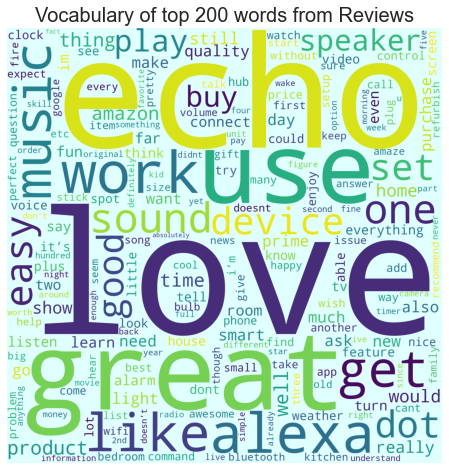

In [68]:
word_cloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(freq_dict)
plt.figure(figsize = (10,8))
plt.axis('off')
plt.title('Vocabulary of top 200 words from Reviews', fontsize = 20)
plt.imshow(word_cloud)
plt.show()

Word Cloud is visualization way of getting most popular words. Bigger the size of words, more frequently that word is used

###### Named Entity Recognition - using Spacy

Using spacy , we will perform named entity recognition over the reviews, which tags the name of person, places, organization,
websites, etc.

In [77]:
# pip install spacy

In [78]:
import spacy

In [83]:
# !python -m spacy download en_core_web_md

In [86]:
import en_core_web_md

In [82]:
nlp = en_core_web_md.load()

In [81]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity : {ent}, Label : {ent.label_}, {spacy.explain(ent.label_)}')

In [85]:
for i in range(15,50):
    one_sentance = df['verified_reviews'][i]
    doc = nlp(one_sentance)
    spacy.displacy.render(doc, style = 'ent', jupyter = True)

### Sentimental Analysis

In [89]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MAKRAND\AppData\Roaming\nltk_data...


True

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [91]:
sentiments = SentimentIntensityAnalyzer()

In [92]:
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['verified_reviews']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['verified_reviews']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['verified_reviews']]

In [94]:
df[['verified_reviews', 'Positive', 'Negative', 'Neutral']].head()

,verified_reviews,Positive,Negative,Neutral
0,Love my Echo!,0.692,0.000,0.308
1,Loved it!,0.807,0.000,0.193
2,"Sometimes while playing a game, you can answer...",0.114,0.102,0.784
3,I have had a lot of fun with this thing. My 4 ...,0.383,0.000,0.617
4,Music,0.000,0.000,1.000


###### Let's classify each review based on highest sentiment score

In [122]:
def sentiment_scores(po,ng,nu):
    if (po > ng) and (po > nu):
        return 'Positive Review'
    if (ng > po) and (ng > nu):
        return 'Negative Review'
    if (nu > po) and (nu > ng):
        return 'Neutral Review'

In [125]:
df['Review_Sentiment'] = df[['Positive', 'Negative','Neutral']].apply(lambda x: sentiment_scores(x['Positive'], x['Negative'], x['Neutral']), axis = 1)
df[['verified_reviews', 'Review_Sentiment']].head()

,verified_reviews,Review_Sentiment
0,Love my Echo!,Positive Review
1,Loved it!,Positive Review
2,"Sometimes while playing a game, you can answer...",Neutral Review
3,I have had a lot of fun with this thing. My 4 ...,Neutral Review
4,Music,Neutral Review


In [127]:
no_of_postive_reviews = len(df[df['Review_Sentiment'] == 'Positive Review'])
no_of_negative_reviews = len(df[df['Review_Sentiment'] == 'Negative Review'])
no_of_neutral_reviews = len(df[df['Review_Sentiment'] == 'Neutral Review'])

print('No. of Postive Reviews on Alexa products = ',no_of_postive_reviews)
print('No. of Negative Reviews on Alexa products = ',no_of_negative_reviews)
print('No. of Neutral Reviews on Alexa products = ',no_of_neutral_reviews)

No. of Postive Reviews on Alexa products =  763
No. of Negative Reviews on Alexa products =  21
No. of Neutral Reviews on Alexa products =  2276


Most of the reviews are neutral and positive in nature, therefore customers are fairly satisfied by the Alexa products

###### Let's calculate overall scores of the reviews customers gave on Alexa products

In [130]:
positives = round(df['Positive'].sum(),2)
negatives = round(df['Negative'].sum(),2)
neutrals = round(df['Neutral'].sum(),2)

In [131]:
print('Overall Postive scores on Alexa Products = ',positives)
print('Overall Negative scores on Alexa Products = ',negatives)
print('Overall Neutral scores on Alexa Products = ',neutrals)

Overall Postive scores on Alexa Products =  1035.37
Overall Negative scores on Alexa Products =  96.9
Overall Neutral scores on Alexa Products =  1936.73


We can observe the greater overall neutral and positive scores on Alexa products, hence customers are quite satisfied with the Alexa products

###### Future Scope

- We can observe variant wise sentiments on Alexa products and see which variant is customer's most and least favorite.
- We can observe negative reviews (21 in nos.) one by one and use those reviews as a feedback system to improve the product.